# California crop production wages analysis

By [Ben Welsh](mailto:ben.welsh@latimes.com)

The Los Angeles Times conducted an analysis of the [Quarterly Census of Employment and Wages](https://www.bls.gov/cew/datatoc.htm) from the U.S. Bureau of Labor Statistics to evaluate pay for crop workers in California.

The analysis found that wages for crop production in California have increased by 13% from 2010 to 2015, twice as fast as average pay in the state. It also found that workers in some parts of the state earn much more than others. Napa County, home to many of the state's wineries, pays workers the most.

Those results were published in a March 17, 2017 story ["Wages rise on California farms. Americans still don’t want the job"](http://www.latimes.com/projects/la-fi-farms-immigration/).

## How we did it

Download 25 years of annual data files from the Bureau of Labor Statistics

In [16]:
%%capture
%run 01-download.ipynb

Combine the files and merge together the statistics for two key industry groups ("Crop production" and "Support activities for crop production")

In [17]:
%%capture
%run 02-transform.ipynb

Use the combined files to develop our key findings below.

### Finding 1: Wages for California crop workers are rising faster than the average job

In [18]:
# Import Python tools
import calculate
import pandas as pd

In [19]:
%matplotlib inline

In [20]:
# Read in state-level data
state_df = pd.read_csv("./data/transformed_state.csv", dtype={"area_fips": "str"})

In [21]:
state_df.head()

,year,area_fips,area_title,industry_group,annual_avg_emplvl,total_annual_wages_2015,avg_annual_pay_2015
0,1990,01000,Alabama -- Statewide,crops,4206,9.879806e+07,23489.791296
1,1990,01000,Alabama -- Statewide,total,1600920,5.943713e+10,37126.860404
2,1990,02000,Alaska -- Statewide,crops,124,3.102915e+06,25023.512010
3,1990,02000,Alaska -- Statewide,total,233887,1.266902e+10,54167.274654
4,1990,04000,Arizona -- Statewide,crops,20405,4.448223e+08,21799.671356


In [22]:
# Filter that down to just California crop workers
ca_state_df = state_df[state_df.area_fips.str.startswith("06")]

In [23]:
ca_state_crops = ca_state_df[ca_state_df.industry_group == 'crops'].set_index("year")

The average crop worker now earns nearly $30,000 a year.

In [24]:
ca_state_crops.at[2015, "avg_annual_pay_2015"]

29631.585333499999

That number has increased 13% from 2010 to 2015 after adjusting for inflation

In [25]:
ca_state_crops.at[2010, "avg_annual_pay_2015"]

26156.526136099998

In [26]:
calculate.percentage_change(
    ca_state_crops.at[2010, "avg_annual_pay_2015"],
    ca_state_crops.at[2015, "avg_annual_pay_2015"]
)

13.285629671609525

And it's twice as fast as the growth of the average wage in the state. 

In [27]:
ca_state_overall = ca_state_df[ca_state_df.industry_group == 'total'].set_index("year")

In [28]:
ca_state_overall.at[2010, "avg_annual_pay_2015"]

57908.716991100002

In [29]:
ca_state_overall.at[2015, "avg_annual_pay_2015"]

61698.114887400006

In [30]:
calculate.percentage_change(
    ca_state_overall.at[2010, "avg_annual_pay_2015"],
    ca_state_overall.at[2015, "avg_annual_pay_2015"]
)

6.543743486636731

Here's the longer term trend of crop worker pay

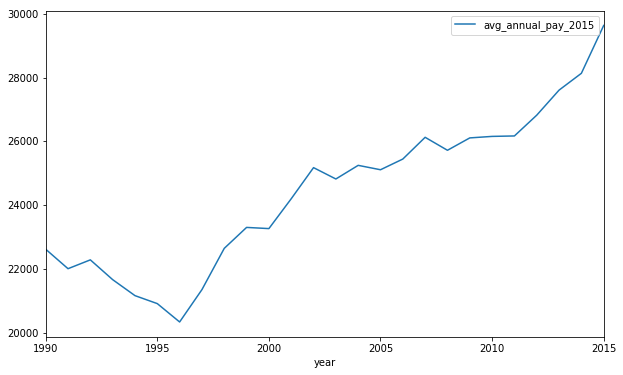

In [31]:
ca_state_crops.reset_index().plot(kind='line', x='year', y='avg_annual_pay_2015', figsize=(10, 6))

In [32]:
ca_state_crops.reset_index()[[
    'year',
    'avg_annual_pay_2015'
]]

,year,avg_annual_pay_2015
0,1990,22621.979520
1,1991,22012.462730
2,1992,22288.953037
3,1993,21669.356598
4,1994,21168.324207
5,1995,20918.440775
6,1996,20343.258272
7,1997,21357.007077
8,1998,22649.556758
9,1999,23305.440398


Which we output for a graphic

In [33]:
ca_state_crops.reset_index()[[
    'year',
    'avg_annual_pay_2015'
]].to_csv("./data/crops-wages-by-year.csv", index=False)

## Finding 2: Napa County has the highest paid farmworkers in California

In [34]:
# Read in county-level data
county_df = pd.read_csv("./data/transformed_county.csv", dtype={"area_fips": str})

In [35]:
county_df.head()

,year,area_fips,area_title,industry_group,annual_avg_emplvl,total_annual_wages_2015,avg_annual_pay_2015
0,1990,01001,"Autauga County, Alabama",total,7871,2.626825e+08,33373.464510
1,1990,01003,"Baldwin County, Alabama",crops,583,1.196884e+07,20529.741335
2,1990,01003,"Baldwin County, Alabama",total,27710,7.644913e+08,27589.005467
3,1990,01005,"Barbour County, Alabama",total,9356,2.872729e+08,30704.670498
4,1990,01007,"Bibb County, Alabama",total,3923,1.053530e+08,26855.214952


In [36]:
# Filter it down to crops
county_crops = county_df[county_df.industry_group == 'crops']

In [37]:
# Filter it down to the latest year of data
trimmed_county_crops_2015 = county_crops[county_crops.year==2015]

In [38]:
# Filter it down to California
trimmed_california_county_crops = trimmed_county_crops_2015[trimmed_county_crops_2015.area_fips.str.startswith("06")]

Napa County has the highest ranking pay of any county in the state

In [39]:
trimmed_california_county_crops.sort_values("avg_annual_pay_2015", ascending=False).head(60)

,year,area_fips,area_title,industry_group,annual_avg_emplvl,total_annual_wages_2015,avg_annual_pay_2015
132278,2015,06055,"Napa County, California",crops,4944,2.073536e+08,41940.453277
132234,2015,06011,"Colusa County, California",crops,1617,6.648710e+07,41117.560297
132298,2015,06075,"San Francisco County, California",crops,99,3.988242e+06,40285.272727
132272,2015,06049,"Modoc County, California",crops,186,7.420400e+06,39894.623656
132230,2015,06007,"Butte County, California",crops,2818,1.122079e+08,39818.285309
132308,2015,06085,"Santa Clara County, California",crops,3522,1.370775e+08,38920.356900
132225,2015,06001,"Alameda County, California",crops,231,8.751965e+06,37887.294372
132264,2015,06041,"Marin County, California",crops,177,6.589747e+06,37230.209039
132244,2015,06021,"Glenn County, California",crops,1018,3.773587e+07,37068.633595
132286,2015,06063,"Plumas County, California",crops,20,7.286920e+05,36434.600000


Output the data for a graphic

In [40]:
trimmed_california_county_crops.sort_values("avg_annual_pay_2015", ascending=False).to_csv("./data/map.csv", index=False)